In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asmaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asmaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# explore the data 

In [2]:
# Load the first dataset (feedback data)
feedback_path = 'C:\\Users\\asmaa\\OneDrive\\Desktop\\americanuniversity\\Student_FeedBack.xlsx'
feedback_df = pd.read_excel(feedback_path)

In [3]:
feedback_df.head(20)

,AcademicYear,SemesterName,ParticipantID,DegreeLevel,Gender,Nationality,StudentProgram,CourseCode,CourseName,QuestionText,QuestionType,ParticipantResponse
0,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Evaluate financial and managerial accoun...,Rating,Disagree
1,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The coursework and assignments are challenging,Rating,Strongly Disagree
2,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The course is relevant to my program of study,Rating,Strongly Disagree
3,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,Course learning materials are available on the...,Rating,Strongly Disagree
4,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,The faculty uses additional resources (other t...,Rating,Strongly Disagree
5,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Define financial accounting concepts cov...,Rating,Strongly Disagree
6,2021,Fall 2021 - 2022,6707335167,Bachelor,Male,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Identify accounting information for effe...,Rating,Strongly Disagree
7,2021,Fall 2021 - 2022,7040336900,Bachelor,Female,Palestine,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Analyze financial statements and make be...,Rating,Disagree
8,2022,Fall 2022 - 2023,7373669733,Bachelor,Female,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Identify accounting information for effe...,Rating,Strongly Agree
9,2022,Fall 2022 - 2023,7373669733,Bachelor,Female,United Arab Emirates,Bachelor of Business Administration,ACC 100,Principles of Accounting,CLO : Define financial accounting concepts cov...,Rating,Strongly Agree


In [4]:
feedback_df.isnull().sum()

AcademicYear               0
SemesterName               0
ParticipantID              0
DegreeLevel                0
Gender                     0
Nationality                0
StudentProgram             0
CourseCode                 0
CourseName                 0
QuestionText               0
QuestionType               0
ParticipantResponse    12121
dtype: int64

In [5]:
# Load the second dataset (course information)
course_info_path = 'C:\\Users\\asmaa\\OneDrive\\Desktop\\americanuniversity\\Course_INFO.xlsx'
course_info_df = pd.read_excel(course_info_path)

In [6]:
course_info_df

,CourseCode,CourseName,College,DegreeName,FieldOfStudy
0,AA 500,Communication Skills in Arabic,College of Media and Mass Communication,Master Degree,UNSPECIFIED
1,ACC 100,Principles of Accounting,College of Business Administration,Bachelor Degree,BA
2,ACC 105,Managerial Accounting,College of Business Administration,Bachelor Degree,BA
3,ACC 200,Intermediate Accounting I,College of Business Administration,Bachelor Degree,BA
4,ACC 205,Intermediate Accounting II,College of Business Administration,Bachelor Degree,BA
...,...,...,...,...,...
914,SSRM 402,Enterprise Risk Management,College of Security and Global Studies,Bachelor Degree,UNSPECIFIED
915,SSRM 403,Risk Analysis,College of Security and Global Studies,Bachelor Degree,UNSPECIFIED
916,SSRM 404,Capstone Graduation Project,College of Security and Global Studies,Bachelor Degree,UNSPECIFIED
917,TAX 600,Contemporary Topics in Taxation,College of Business Administration,Master Degree,BA


In [7]:
course_info_df.isnull().sum()

CourseCode      0
CourseName      0
College         0
DegreeName      0
FieldOfStudy    0
dtype: int64

In [8]:
course_info_df.DegreeName.unique()

array(['Master Degree', 'Bachelor Degree'], dtype=object)

In [9]:
course_info_df.College.unique()

array(['College of Media and Mass Communication',
       'College of Business Administration', 'College of Education',
       'Foundation Program', 'College of Security and Global Studies',
       'College of Computer Information Technology', 'College of Design',
       'College of Law', 'Training Courses'], dtype=object)

In [10]:
course_info_df.FieldOfStudy.unique()

array(['UNSPECIFIED', 'BA', 'EDUCATION', 'IT', 'ARTS_DESIGN',
       'MASS_COMM_PR', 'LAW_SHARIA', 'HUMANITIES_SOCIAL_SC'], dtype=object)

In [11]:
# Merge the datasets based on 'CourseCode'
merged_df = feedback_df.merge(course_info_df, on='CourseCode', how='left')

In [12]:
# Save the merged_df DataFrame to an output file
output_filename = 'C:\\Users\\asmaa\\OneDrive\\Desktop\\americanuniversity\\merged_df.xlsx'  # Change this to your desired file name
merged_df.to_excel(output_filename, index=False)

In [13]:
# Dataset Information
print("Dataset Information:")
print("Number of Rows:", len(merged_df))
print("Number of Columns:", len(merged_df.columns))

Dataset Information:
Number of Rows: 180969
Number of Columns: 16


In [14]:
 # Descriptive Statistics
print("Descriptive Statistics:")
descriptive_stats = merged_df.describe()
print(descriptive_stats)

Descriptive Statistics:
        AcademicYear  ParticipantID
count  180969.000000   1.809690e+05
mean     2021.528864   6.603992e+09
std         0.500163   5.140711e+08
min      2021.000000   4.727001e+09
25%      2021.000000   6.373667e+09
50%      2022.000000   6.707001e+09
75%      2022.000000   7.040668e+09
max      2023.000000   7.427334e+09


In [15]:
# correlation_matrix 
correlation_matrix = merged_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               AcademicYear  ParticipantID
AcademicYear       1.000000       0.365549
ParticipantID      0.365549       1.000000


# Data preprocessing

In [16]:
#check null values 
#check duplicate values
#check inconsistence data 

In [17]:
# Check for missing values in the dataframe
missing_values = merged_df.isnull().sum()
missing_values

AcademicYear               0
SemesterName               0
ParticipantID              0
DegreeLevel                0
Gender                     0
Nationality                0
StudentProgram             0
CourseCode                 0
CourseName_x               0
QuestionText               0
QuestionType               0
ParticipantResponse    12121
CourseName_y            6541
College                 6541
DegreeName              6541
FieldOfStudy            6541
dtype: int64

# Remove Duplicate Values

In [18]:
# Check for duplicate values in the dataframe
duplicate_rows = merged_df.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_data = merged_df[duplicate_rows]


In [19]:
merged_df.drop_duplicates(inplace=True)

# drop Un necessary columns

In [20]:
# column CourseName_y same CourseName_x
merged_df.drop(columns=['CourseName_y'], inplace=True)

# check Data Value

In [21]:

for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'AcademicYear':
[2021 2022 2023]

Unique values in column 'SemesterName':
['Fall 2021 - 2022' 'Fall 2022 - 2023' 'Spring 2022 - 2023'
 'Spring 2021 - 2022' 'Summer I 2021 - 2022' 'Summer II 2021 - 2022'
 'Summer I 2022 - 2023' 'Summer II 2022 - 2023' 'Fall 2023 - 2024']

Unique values in column 'ParticipantID':
[7040336900 6707335167 7373669733 ... 6390334967 5724000267 7041000167]

Unique values in column 'DegreeLevel':
['Bachelor' 'Master' 'Non-Degree']

Unique values in column 'Gender':
['Female' 'Male']

Unique values in column 'Nationality':
['Palestine' 'United Arab Emirates' 'Syria' 'Jordan'
 'Kingdom of Saudi Arabia' 'Egypt' 'Lebanon' 'Nigeria' 'Yemen' 'Bahrain'
 'Iraq' 'Pakistan' 'Somalia' 'Sudan' 'Bangladesh' 'Iran' 'Morocco'
 'United States of America' 'India' 'Libya' 'Turkey' 'Afghanistan'
 'Comoros' 'Dominican Republic' 'United Kingdom' 'Russia' 'Tunisia'
 'Burkina Faso' 'Sweden' 'Kazakstan' 'Germany' 'Commonwealth of Dominica'
 'Oman' 'Tanzania' 'P

# handle Null values in ParticipantResponse

In [22]:
#handle Null values in ParticipantResponse
merged_df['ParticipantResponse'].fillna('No Response', inplace=True)


# handle Null values in College 

In [23]:
        
# Define a function to extract the word after "of" in Student Program
def extract_word_after_of_or_in(program):
    if pd.notnull(program):
        if 'of' in program:
            return program.split('of', 1)[1].strip()
        elif 'in' in program:
            return program.split('in', 1)[1].strip()
    return ''
merged_df.loc[merged_df['College'].isnull(), 'College'] = 'College of ' + merged_df.loc[merged_df['College'].isnull(),'StudentProgram'].apply(extract_word_after_of_or_in)



# impute null values in DegreeName    

In [24]:
         
# Define a function to extract the first word from Student Program
def extract_first_word(program):
    if pd.notnull(program):
        # Split the program string into words
        words = program.split()
        if len(words) > 1 and words[0].lower() == 'professional':
            # If the first word is 'Professional', return the second word
            return  words[1] +' Degree'
        else:
            # Otherwise, return the first word with 'Degree'
            return  words[0]+' Degree'
    return ''
  
# Apply the function to extract the first word# Apply the function to fill null values in 'Degree' column
merged_df.loc[merged_df['DegreeName'].isnull(), 'DegreeName'] = merged_df.loc[merged_df['DegreeName'].isnull(), 'StudentProgram'].apply(extract_first_word)


In [25]:
merged_df.College.unique()

array(['College of Business Administration', 'College of Education',
       'College of Law', 'College of Public Relations',
       'College of Security and Global Studies',
       'College of Computer Information Technology',
       'College of Science in Computer Science',
       'College of Science in Information Technology Management',
       'College of Arts in Media and Mass Communication',
       'College of Design',
       'College of Arts in Security and Strategic Studies',
       'College of Science in Design - Graphic Design',
       'College of Science in Design - Interior Design',
       'College of Science in Design - Digital Animation',
       'College of Science in Design - Fashion Design',
       'College of Media and Mass Communication', 'Training Courses',
       'College of Knowledge Management', 'College of Arbitration',
       'College of essional Master in Sports Law',
       'College of Arts in Diplomacy',
       'College of Security Studies and Information Anal

In [26]:
merged_df.FieldOfStudy.unique()

array(['BA', 'UNSPECIFIED', 'EDUCATION', nan, 'IT', 'ARTS_DESIGN',
       'MASS_COMM_PR', 'LAW_SHARIA', 'HUMANITIES_SOCIAL_SC'], dtype=object)

# impute null values in FieldOfStudy    

In [27]:
 #Create a dictionary mapping between 'College' and 'FieldOfStudy'
college_to_field_of_study = {
    'College of Business Administration': 'BA',
    'College of Education': 'EDUCATION',
    'College of Law': 'LAW_SHARIA',
    'College of Public Relations': 'Public Relations',
    'College of Security and Global Studies': 'HUMANITIES_SOCIAL_SC',
    'College of Computer Information Technology': 'IT',
    'College of Science in Computer Science': 'Computer Science',
    'College of Science in Information Technology Management': 'Information Technology Management',
    'College of Arts in Media and Mass Communication': 'MASS_COMM_PR',
    'College of Design': 'ARTS_DESIGN',
    'College of Arts in Security and Strategic Studies': 'Security and Strategic Studies',
    'College of Science in Design - Graphic Design': 'Graphic Design',
    'College of Science in Design - Interior Design': 'Interior Design',
    'College of Science in Design - Digital Animation': 'Digital Animation',
    'College of Science in Design - Fashion Design': 'Fashion Design',
    'College of Media and Mass Communication': 'MASS_COMM_PRzh',
    'Training Courses': 'Training Courses',
    'College of Knowledge Management': 'Knowledge Management',
    'College of Arbitration': 'Arbitration',
    'College of essional Master in Sports Law': 'Sports Law',
    'College of Arts in Diplomacy': 'Diplomacy',
    'College of Security Studies and Information Analysis': 'Security Studies and Information Analysis'
}

# Step 3: Use the dictionary to impute null values in 'FieldOfStudy'
# Iterate through the DataFrame
for index, row in merged_df.iterrows():
    college = row['College']
    field_of_study = row['FieldOfStudy']
    
    # Check if 'FieldOfStudy' is null
    if pd.isnull(field_of_study):
        # Look up the corresponding 'FieldOfStudy' value in the dictionary using 'College' as the key
        if college in college_to_field_of_study:
            merged_df.at[index, 'FieldOfStudy'] = college_to_field_of_study[college]


In [28]:
# Check for missing values in the dataframe
missing_values = merged_df.isnull().sum()
missing_values

AcademicYear           0
SemesterName           0
ParticipantID          0
DegreeLevel            0
Gender                 0
Nationality            0
StudentProgram         0
CourseCode             0
CourseName_x           0
QuestionText           0
QuestionType           0
ParticipantResponse    0
College                0
DegreeName             0
FieldOfStudy           0
dtype: int64

In [29]:
# Save the merged_df DataFrame to an output file
outputprocessing_filename = 'C:\\Users\\asmaa\\OneDrive\\Desktop\\americanuniversity\\mergedprocessing.xlsx'  # Change this to your desired file name
merged_df.to_excel(outputprocessing_filename, index=False)

In [30]:
merged_df.ParticipantResponse.head(20)

0              Disagree
1     Strongly Disagree
2     Strongly Disagree
3     Strongly Disagree
4     Strongly Disagree
5     Strongly Disagree
6     Strongly Disagree
7              Disagree
8        Strongly Agree
9        Strongly Agree
10    Strongly Disagree
11    Strongly Disagree
12    Strongly Disagree
13          No Response
14       Strongly Agree
15       Strongly Agree
16       Strongly Agree
17                Agree
18                Agree
19                Agree
Name: ParticipantResponse, dtype: object

# text preprocessing for ParticipantResponse

In [31]:
# Function for text preprocessing for ParticipantResponse
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    translator = str.maketrans('', '', string.punctuation + string.digits)
    text = text.translate(translator)

    # Tokenization (splitting text into words)
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply preprocessing to the DataFrame
merged_df['ParticipantResponse'] = merged_df['ParticipantResponse'].apply(preprocess_text)

# Display the cleaned data
print(merged_df['ParticipantResponse'])


0                  disagree
1         strongly disagree
2         strongly disagree
3         strongly disagree
4         strongly disagree
                ...        
180964             response
180965                agree
180966       strongly agree
180967       strongly agree
180968       strongly agree
Name: ParticipantResponse, Length: 179746, dtype: object


In [32]:
merged_df['CourseName_x'] = merged_df['CourseName_x'].apply(preprocess_text)
merged_df['CourseName_x']

0         principle accounting
1         principle accounting
2         principle accounting
3         principle accounting
4         principle accounting
                  ...         
180964     tolerance diversity
180965     tolerance diversity
180966     tolerance diversity
180967     tolerance diversity
180968     tolerance diversity
Name: CourseName_x, Length: 179746, dtype: object

In [33]:
merged_df['QuestionText'] = merged_df['QuestionText'].apply(preprocess_text)
merged_df['QuestionText']

0         clo evaluate financial managerial accounting i...
1                         coursework assignment challenging
2                             course relevant program study
3                 course learning material available portal
4         faculty us additional resource textbook enhanc...
                                ...                        
180964    recommendation suggestion course could improve...
180965    clo analyze relationship diversity tolerance w...
180966    faculty discussed course syllabus beginning se...
180967                    coursework assignment challenging
180968                        course relevant program study
Name: QuestionText, Length: 179746, dtype: object

In [34]:
merged_df.columns

Index(['AcademicYear', 'SemesterName', 'ParticipantID', 'DegreeLevel',
       'Gender', 'Nationality', 'StudentProgram', 'CourseCode', 'CourseName_x',
       'QuestionText', 'QuestionType', 'ParticipantResponse', 'College',
       'DegreeName', 'FieldOfStudy'],
      dtype='object')

# Sentiment Analysis

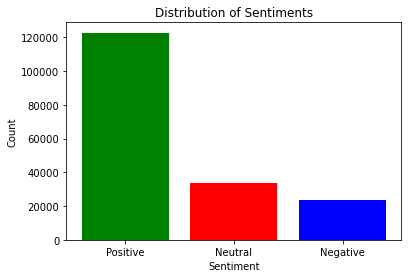

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis and store the results in a new column
merged_df['Sentiment'] = merged_df['ParticipantResponse'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Categorize sentiment into positive, negative, or neutral
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['SentimentLabel'] = merged_df['Sentiment'].apply(categorize_sentiment)

# Create a bar plot to show the distribution of sentiments
sentiment_counts = merged_df['SentimentLabel'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()


In [36]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [37]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pprint


# Topic Modeling:


In [38]:
participant_response_data = merged_df['ParticipantResponse'].values.tolist()

# Tokenize the text and create a list of words for each document
tokenized_participant_response = [text.split() for text in participant_response_data]

# Create a dictionary and corpus for the "ParticipantResponse" column
dictionary_participant_response = corpora.Dictionary(tokenized_participant_response)
corpus_participant_response = [dictionary_participant_response.doc2bow(tokens) for tokens in tokenized_participant_response]


In [39]:
# Define the number of topics (you can adjust this)
num_topics = 5

# Train an LDA model for the "ParticipantResponse" column
lda_model_participant_response = LdaModel(corpus_participant_response, num_topics=num_topics, id2word=dictionary_participant_response, passes=15)


In [40]:
# Print topics and representative keywords for the "ParticipantResponse" column
print("Topics in ParticipantResponse:")
pprint.pprint(lda_model_participant_response.print_topics())


Topics in ParticipantResponse:
[(0,
  '0.566*"disagree" + 0.406*"strongly" + 0.003*"none" + 0.000*"sss" + '
  '0.000*"ه" + 0.000*"لازيوجد" + 0.000*"nn" + 0.000*"nl" + 0.000*"fear" + '
  '0.000*"iphone"'),
 (1,
  '0.662*"agree" + 0.317*"neutral" + 0.000*"sss" + 0.000*"ه" + 0.000*"لازيوجد" '
  '+ 0.000*"nn" + 0.000*"nl" + 0.000*"hzhzhahz" + 0.000*"hahshshha" + '
  '0.000*"nun"'),
 (2,
  '0.497*"strongly" + 0.497*"agree" + 0.000*"sss" + 0.000*"ه" + '
  '0.000*"لازيوجد" + 0.000*"nn" + 0.000*"nl" + 0.000*"hzhzhahz" + '
  '0.000*"hahshshha" + 0.000*"nun"'),
 (3,
  '0.032*"course" + 0.017*"good" + 0.017*"dr" + 0.016*"و" + 0.015*"في" + '
  '0.014*"من" + 0.011*"على" + 0.010*"best" + 0.010*"thank" + 0.008*"doctor"'),
 (4,
  '0.848*"response" + 0.024*"لا" + 0.018*"great" + 0.007*"يوجد" + '
  '0.003*"perfect" + 0.002*"gg" + 0.002*"na" + 0.001*"chair" + 0.001*"table" + '
  '0.001*"uncomfortable"')]


# Opinion Mining:

In [ ]:
from textblob import TextBlob

# Define a function for opinion mining
def perform_opinion_mining(text):
    # Create a TextBlob object to analyze sentiment
    analysis = TextBlob(text)
    
    # Determine sentiment polarity (-1 for negative, 1 for positive)
    sentiment_polarity = analysis.sentiment.polarity
    
    # Categorize sentiment based on polarity
    if sentiment_polarity > 0:
        return 'Positive'
    elif sentiment_polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
# Apply opinion mining to the 'ParticipantResponse' column and store the results in a new column
merged_df['Opinion'] = merged_df['ParticipantResponse'].apply(perform_opinion_mining)

# Visualize the distribution of opinions
opinion_counts = merged_df['Opinion'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
opinion_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Opinion')
plt.ylabel('Count')
plt.title('Distribution of Opinions in Student Feedback')
plt.show()

# Insights and Recommendations:


Positive (120,000): The majority of student feedback appears to be positive, 
    indicating that many students have positive experiences with their courses. 
    This is a significant strength and suggests that the institution is doing well in providing a positive learning environment.

Neutral (4,000): A portion of feedback is neutral, which may imply that some students have mixed feelings or are 
    neutral about their experiences. Further investigation is needed to understand the reasons behind this sentiment 
    and gather more detailed feedback.

Negative (2,000): Although a smaller portion, the negative feedback should not be ignored. 
    It's crucial to analyze these comments carefully to identify specific issues or concerns raised by students. 
    Addressing these concerns can lead to improvements in courses and student satisfaction.



# Based on this sentiment distribution, it's recommended to:

Conduct in-depth analysis of the negative feedback to pinpoint specific issues and areas for improvement.
Explore the neutral feedback to understand the reasons behind students' mixed sentiments.
Continue to leverage the positive feedback as a valuable indicator of the institution's strengths in course delivery.
These insights can guide actions and improvements in course offerings and overall student satisfaction.